In [1]:
import json
import numpy as np
import os
import cv2
import scipy.io as sio
import copy
import random
import tensorflow as tf
from glob import glob
from tqdm import tqdm
%matplotlib widget
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
path = "/aidata/anders/objects/3D-head/LS3D-W/stat/params.npy"
params  = np.load(path)
params = params[:10, :]

<ipython-input-3-01c18c7340a6>:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


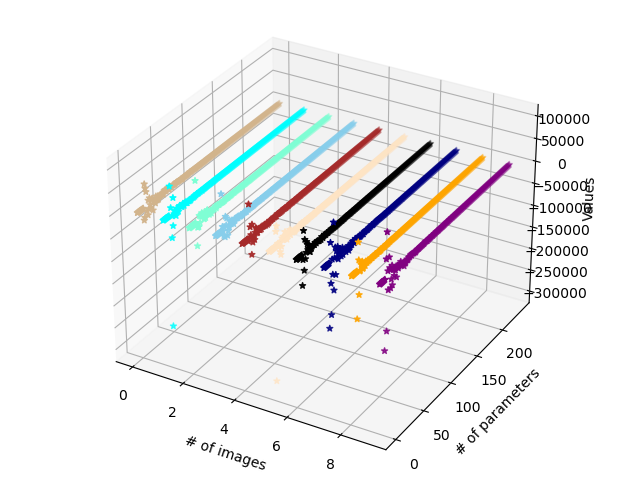

In [3]:
cnames = {
'tan':'#D2B48C',
'aqua':'#00FFFF',
'aquamarine':'#7FFFD4',
'skyblue': '#87CEEB',
'brown':'#A52A2A',
'bisque':'#FFE4C4',
'black':'#000000',
'navy':'#000080',
'orange':'#FFA500',
'purple':'#800080'
}
keys = list(cnames.keys())

# create the graph
fig = plt.figure()
ax = Axes3D(fig)

N, C = np.shape(params)
n_idxs = np.arange(N)[:, np.newaxis]
n_idxs = np.tile(n_idxs, [1, C])
n_idxs =np.reshape(n_idxs, [-1])

c_idxs = np.arange(C)[:, np.newaxis]
c_idxs = np.repeat(c_idxs, N, axis =-1).T
c_idxs = np.reshape(c_idxs, (-1))
vals = params[n_idxs, c_idxs]

for i in range(N):
    # creating the plot
    n_idx =  n_idxs[C * i:C * (i+1)]
    c_idx =  c_idxs[C * i:C * (i+1)]
    val = params[n_idx, c_idx]
    plot_geeks = ax.scatter(n_idx, c_idx, val, marker="*", color = keys[i])
    
# ax.set_zticks(np.arange(min(vals), max(vals)+1, 100000.0))
# setting title and labels
# ax.set_title("3D plot")
ax.set_xlabel('# of images')
ax.set_ylabel('# of parameters')
ax.set_zlabel('Values')
ax.FontSize = 20
plt.show()


<ipython-input-4-5705ed6ec0c0>:16: RuntimeWarning: invalid value encountered in log
  Z = np.log(one_params)


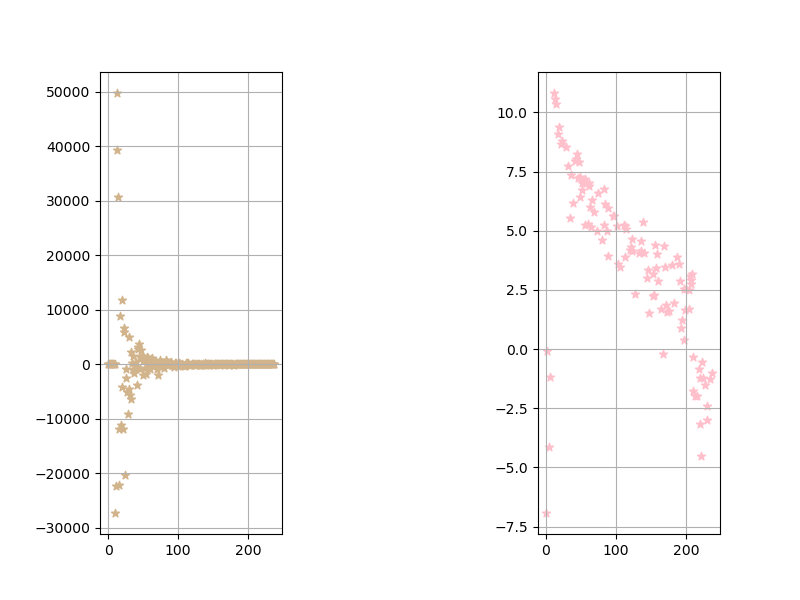

In [4]:
c_idx = c_idxs[:238]
one_params = params[0, c_idx]
mean_params = np.mean(params, axis = 0)
std_params = np.std(params, axis = 0)


fig = plt.figure(figsize=(8, 6))

plt.subplot(131)
plt.scatter(c_idx, one_params, marker="*", color='tan')
plt.grid()
plt.subplot(133)
#


Z = np.log(one_params)
# Z = (one_params - mean_params ) / std_params

plt.scatter(c_idx, Z, marker="*", color='pink')
plt.grid()